# Notice of this NoteBook

Since this notebook is loading data from my last saved dataset, I am going to include the previous data clean up code here as markdown cells to avoid conflicts. 

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

pd.options.display.max_columns = 120
pd.options.display.max_rows = 3000

# Loading dataset from Kaggle

In [2]:
#loading the datase from train and test .csv

df = pd.read_csv('../project_2/datasets/train.csv')

In [3]:
#Viewing the first two lines of dataframe to get a quick view of data points available.  

df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# lower case and snake_case column names

In [4]:
#Process column names against train data
#df.head(2) to varify column names are successfully updated.

df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


# Check null values

In [5]:
# Get a quick view of null and types iof all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [12]:
df['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

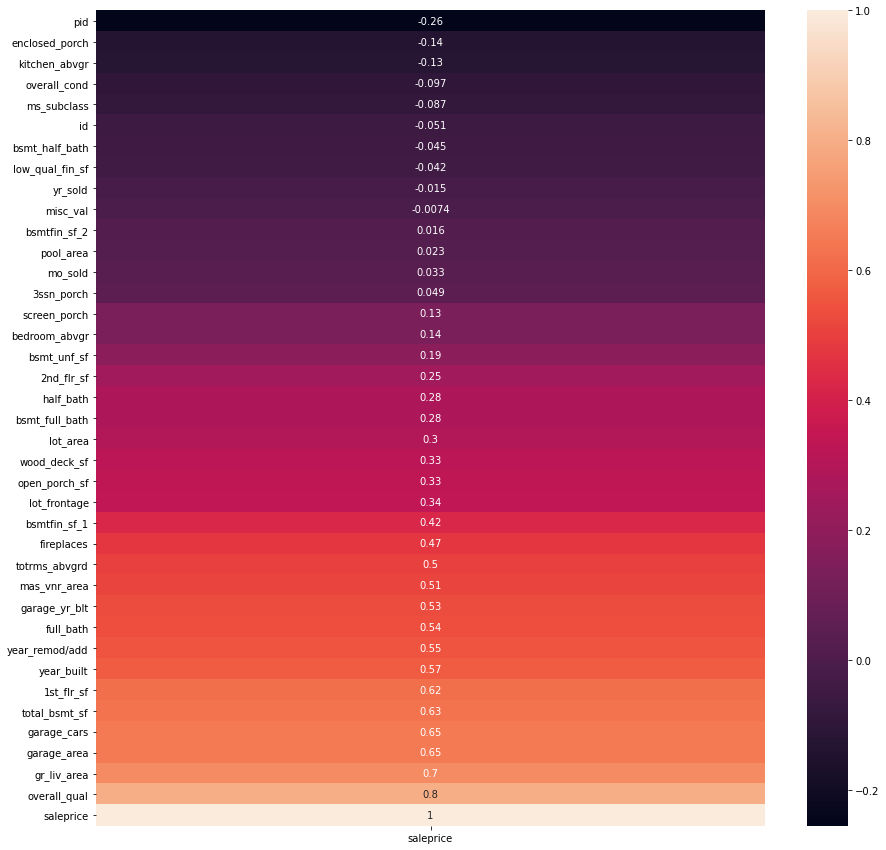

In [6]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
# Viewing heatmap to decide what datapoint to be included to start with.

plt.figure(figsize = (15, 15))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

In [7]:
#considering the amount of data in the dataset
    ##Starting with cleaning up the numeric fields
    ## Create a boolean filter to get numeric columns

num_col = ['overall_qual', 'overall_cond', 'gr_liv_area', 'garage_area', 'total_bsmt_sf',
           '1st_flr_sf', 'year_built', 'bsmtfin_sf_1', 'lot_area', '2nd_flr_sf', 
           'bsmt_unf_sf','open_porch_sf', 'totrms_abvgrd']

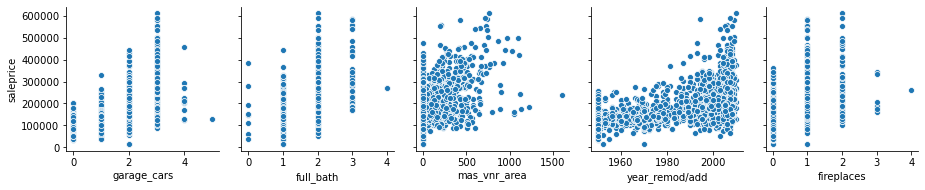

In [8]:
# Among the high correlation features, leaving these out for now
    ## Even it's numeric but it sereves more like categories 
    ## Concering the 0s adding too much noise to the model

sns.pairplot(df, y_vars=['saleprice'], x_vars=['garage_cars', 'full_bath','mas_vnr_area',
                                               'year_remod/add', 'fireplaces'])

In [9]:
#Empty fields
df[num_col].isnull().sum()

overall_qual     0
overall_cond     0
gr_liv_area      0
garage_area      1
total_bsmt_sf    1
1st_flr_sf       0
year_built       0
bsmtfin_sf_1     1
lot_area         0
2nd_flr_sf       0
bsmt_unf_sf      1
open_porch_sf    0
totrms_abvgrd    0
dtype: int64

In [10]:
#Check garage_area isnull
    
df[df['garage_area'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [11]:
# Replace null with 0

df.loc[1712,'garage_area'] = 0

In [13]:
# Varify garage_area nan is replaced by 0

df[num_col].loc[1712]

overall_qual        5.0
overall_cond        6.0
gr_liv_area      1828.0
garage_area         0.0
total_bsmt_sf     859.0
1st_flr_sf        942.0
year_built       1923.0
bsmtfin_sf_1      548.0
lot_area         9060.0
2nd_flr_sf        886.0
bsmt_unf_sf       311.0
open_porch_sf       0.0
totrms_abvgrd       6.0
Name: 1712, dtype: float64

In [14]:
# Review other fields
df[num_col].isnull().sum()

overall_qual     0
overall_cond     0
gr_liv_area      0
garage_area      0
total_bsmt_sf    1
1st_flr_sf       0
year_built       0
bsmtfin_sf_1     1
lot_area         0
2nd_flr_sf       0
bsmt_unf_sf      1
open_porch_sf    0
totrms_abvgrd    0
dtype: int64

In [15]:
# check bsmtfin_sf_1 .isnull()

df[df['bsmtfin_sf_1'].isnull()]
    ## bsmtfin_sf_1, bsmt_unf_sf, total_bsmt_sf == all missing
    ## Going to drop this row

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [16]:
# Drop row 1327

df.drop(1327, inplace = True)

In [18]:
# Varify whether there are still any nulls
df[num_col].isnull().sum()

overall_qual     0
overall_cond     0
gr_liv_area      0
garage_area      0
total_bsmt_sf    0
1st_flr_sf       0
year_built       0
bsmtfin_sf_1     0
lot_area         0
2nd_flr_sf       0
bsmt_unf_sf      0
open_porch_sf    0
totrms_abvgrd    0
dtype: int64

In [19]:
# Make a copy of first cleanup

df_processed = df.copy()

# Location, Location, Location 
- Dummy neighborhood field 
- Concat dummy with df

In [20]:
#Other than the above numeric fields, also include the meighborhood in the first model 

nb_dummies = pd.get_dummies(df[['neighborhood']], drop_first = True)
nb_dummies.head(2)

,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
df = pd.concat([df, nb_dummies], axis = 1)
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
# Rest the index after all the changes made above
df.reset_index(drop = True, inplace = True)

# Define Feature Matrix & Target

In [43]:
features = ['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1', 'bsmt_unf_sf', 'garage_area', 'gr_liv_area','lot_area',
            'open_porch_sf', 'overall_cond', 'overall_qual', 'total_bsmt_sf',
            'totrms_abvgrd', 'year_built', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
            'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 
            'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR',
            'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
            'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
            'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
            'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker']

In [44]:
y = df['saleprice']
X = df[features]

## Train_test_split

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

# First model instantiate, fit, score

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
cross_val_score(lr, X_train, y_train).mean()

0.8441984337288602

In [49]:
cross_val_score(lr, X_valid, y_valid).mean()

0.6839501205575459

In [50]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

(0.8618906983332164, 0.7882482822072999)

### Judging from the score, the model is over feeding. 
- Is there a way to simplify the features?

In [51]:
# Check coef_
list(zip(X.columns, lr.coef_))

[('1st_flr_sf', 37.46881553727074),
 ('2nd_flr_sf', 35.600937152451664),
 ('bsmtfin_sf_1', 11.094233511339935),
 ('bsmt_unf_sf', -13.766508299049578),
 ('garage_area', 35.309358820140254),
 ('gr_liv_area', 7.623603174666691),
 ('lot_area', 0.8011329301147728),
 ('open_porch_sf', 6.01829671096432),
 ('overall_cond', 6330.935003053449),
 ('overall_qual', 14667.682656678438),
 ('total_bsmt_sf', 25.92852467618337),
 ('totrms_abvgrd', 1098.6403054734),
 ('year_built', 482.5101256661967),
 ('neighborhood_Blueste', -20968.904724091128),
 ('neighborhood_BrDale', -22247.883874162875),
 ('neighborhood_BrkSide', 5726.95273576102),
 ('neighborhood_ClearCr', 8584.701309081871),
 ('neighborhood_CollgCr', -179.2224603822578),
 ('neighborhood_Crawfor', 27929.12005980098),
 ('neighborhood_Edwards', -7566.7566371978855),
 ('neighborhood_Gilbert', -1018.9843407339556),
 ('neighborhood_Greens', -2927.829762922983),
 ('neighborhood_GrnHill', 97074.21552025908),
 ('neighborhood_IDOTRR', 4213.958226128278),


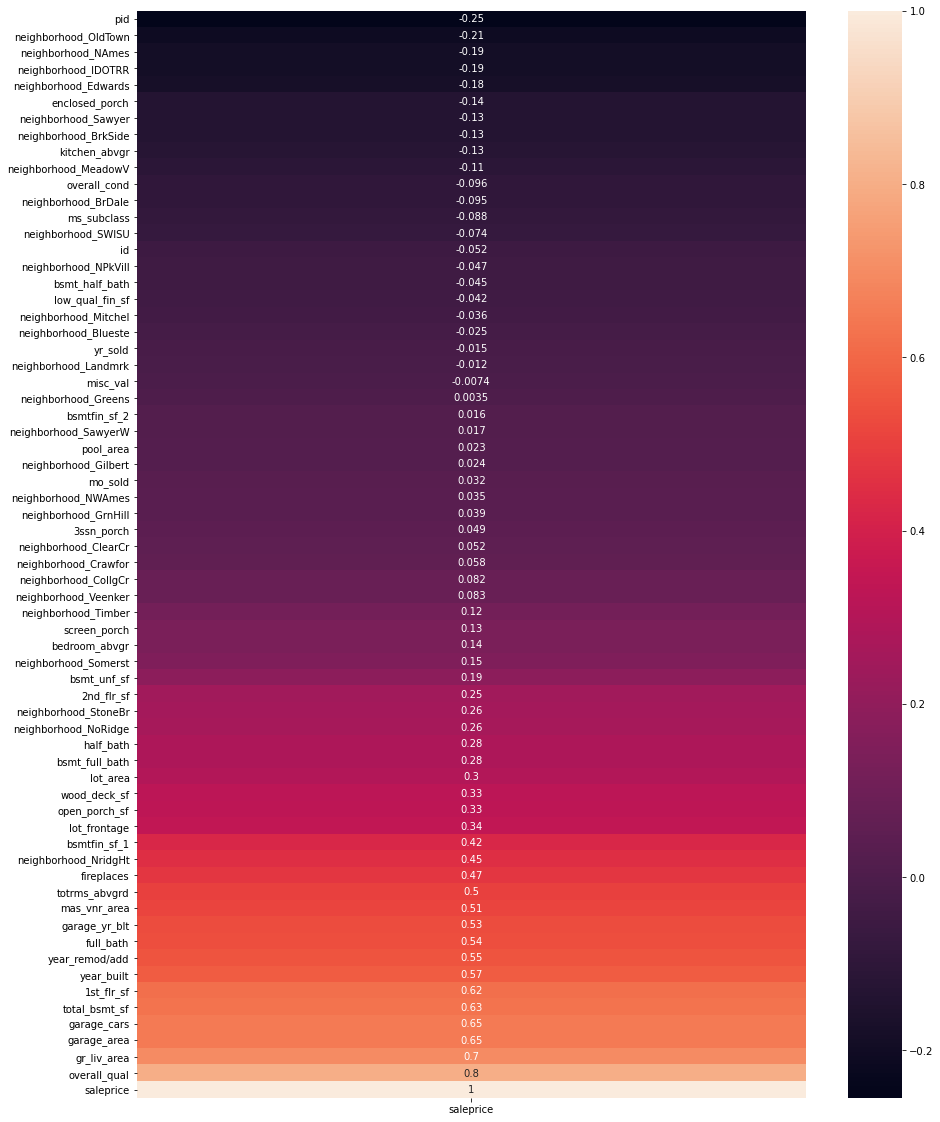

In [53]:
plt.figure(figsize = (15, 20))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

- After reviewing the correlation from above. Decided to try a few new things:
    - Drop similar feature with similar correlation level 
    - Adding features with higher correlations
    - Review neighborhood price range and assign ranking to each neighbord 
    - Create a few intersept features 

# Clean-up and EDA

In [ ]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
plt.figure(figsize = (15, 25))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['garage_area', 'total_bsmt_sf','1st_flr_sf', 'frxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['year_built', 'year_remod/add', 'totrms_abvgrd', 'garage_cars'])

In [ ]:
df.to_csv('df_train_sub16.csv', index = False)

# Define Feature Matrix & Target

In [ ]:
df = pd.read_csv('../project_2/dfforpoly.csv')

In [ ]:
features = ['overall_qual', 'gr_liv_area', 'nb_ranking', 'garage_area',
            'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built',
           'full_bath', 'totrms_abvgrd', 'mas_vnr_area']

In [ ]:
df[features].isnull().sum()

In [ ]:
y = df['saleprice']
X = df[features]

In [ ]:
lr = LinearRegression()

# Polynomial Transform

In [ ]:
poly = PolynomialFeatures(include_bias=False)

In [ ]:
X_poly = poly.fit_transform(X)
X_poly

In [ ]:
poly.get_feature_names(features)

In [ ]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(features)).head(2)

In [ ]:
cross_val_score(lr, X_poly, y).mean()

## Standardscaler transform

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_poly)

In [ ]:
X_ss = ss.transform(X_poly)

In [ ]:
cross_val_score(lr, X_ss, y).mean()

# LASSO

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
import warnings; warnings.simplefilter('ignore')

In [ ]:
#l_alphas = np.logspace(-3, 0, 10)
l_alphas = np.logspace(1, 1)
l_alphas

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)


# Fit model using best ridge alpha!
lasso_cv.fit(X_ss, y)

In [ ]:
print(lasso_cv.score(X_ss, y))

In [ ]:
X_ss.shape

## Enable Statesmodel

import statsmodels.api as sm

X = sm.add_constant(X_ss, prepend=True)
    ## adding constant 1 
results = sm.OLS(y, X).fit()

results.summary()

X.columns

X = X.drop(columns = 'const')

X.columns

# Cross-validation gives a negative average R^2?!

# 
from sklearn.model_selection import KFold
cv_scores = cross_val_score(lr, X, y, cv=KFold(5, shuffle=True))

cv_scores = cross_val_score(lr, X, y, cv=5)
print(cv_scores.mean())

#### Train-Test-Split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

#### Instantiate, Fit, Score Model

lr.fit(X_train, y_train)

lr.score(X_train, y_train)

cross_val_score(lr, X_train, y_train)

cross_val_score(lr, X_train, y_train).mean()

cross_val_score(lr, X_valid, y_valid)

cross_val_score(lr, X_valid, y_valid).mean()

lr.score(X_train, y_train), lr.score(X_valid, y_valid)

list(zip(X.columns, lr.coef_))

#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [ ]:
df_test = pd.read_csv('../project_2/dftestpoly.csv')

In [ ]:
df_test.shape

In [ ]:
df_test[features].isnull().sum()

In [ ]:
df_test.to_csv('df_test_sub16.csv', index = False)

#### Make sure there aren't any nulls in the columns we used in the model:

In [ ]:
X_TEST = df_test[features]

In [ ]:
X_TEST.shape

In [ ]:
X_TEST.isnull().sum()

In [ ]:
X_TEST['mas_vnr_area'] = X_TEST['mas_vnr_area'].fillna(0)

In [ ]:
X_TEST.isnull().sum()

X_TEST_SC = ss.transform(X_TEST)

# Polynomial Transform

In [ ]:
poly = PolynomialFeatures(include_bias=False)

In [ ]:
X_TEST_poly = poly.fit_transform(X_TEST)
X_TEST_poly

## Standardscaler transform

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_TEST_poly)

In [ ]:
X_TEST_ss = ss.transform(X_TEST_poly)

In [ ]:
X_TEST_ss.shape

# LASSO

#### Create Predictions

In [ ]:
#df_test['y_hat'] = lr.predict(X_TEST)
df_test['y_hat'] = lasso_cv.predict(X_TEST_ss)

In [ ]:
df_test.head()

In [ ]:
df_test.shape

# Create Submission and check the result

In [ ]:
nars_submission = df_test[['id', 'y_hat']]
nars_submission.head()

In [ ]:
# Check submission shpe
nars_submission.shape

# Rename columns of the fisrt submission

In [ ]:
nars_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

In [ ]:
nars_submission.shape

In [ ]:
nars_submission.head()

#### Export as a CSV

In [ ]:
nars_submission.to_csv('nars_submission_16.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

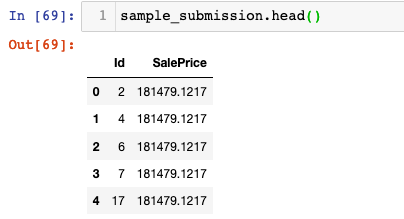